# Determinants of Box Office Success

## Import Modules and Data

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
from scipy.stats import iqr

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv('movie_data.csv')

## Explore and Clean Dataset

**Numeric variables:** 
- <code>num_critic_reviews</code>
- <code>duration</code>
- <code>director_facebook_likes</code>
- <code>actor_1_facebook_likes</code>
- <code>actor_2_facebook_likes</code>
- <code>actor_3_facebook_likes</code>
- <code>movie_facebook_likes</code>
- <code>gross</code>
- <code>num_users_voted (int)</code>
- <code>cast_total_facebook_likes (int)</code>
- <code>num_user_reviews</code>
- <code>budget</code>
- <code>title_year</code>
- <code>movie_score</code>
- <code>aspect_ratio (int)</code>

**Categorical variables:** 
- <code>color</code>
- <code>director_name</code>
- <code>actor_1_name</code>
- <code>actor_2_name</code>
- <code>actor_3_name</code>
- <code>genres</code>
- <code>plot_keywords</code>
- <code>language</code>
- <code>country</code>
- <code>content_rating</code>

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_users_voted            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
# remove duplicate rows based on the 'movie_title' and 'title_year' column
movies.drop_duplicates(subset=['movie_title','title_year'], keep=False, inplace=True)

# reset index
movies.reset_index(drop=True, inplace=True)

In [6]:
# replace zeros in budget and gross columns with NaN
movies['budget'] = movies['budget'].replace(0, np.NaN)
movies['gross'] = movies['gross'].replace(0,np.NaN)

# transform budget and gross metrics to show in millions
movies['budget_millions'] = round(movies['budget'] / 1000000, 4)
movies['gross_millions'] = round(movies['gross'] / 1000000, 4)

# add calculated columns
movies['profit_millions'] = movies['gross_millions'] - movies['budget_millions']
movies['roi'] = round((movies['profit_millions'] / movies['budget_millions']), 4)
movies['profit_margin'] = movies['profit_millions'] / movies['gross_millions']

### Remove irrelevant movies
**Challenge**<br>
The dataset contains movies that are not relevant to the move studio's current strategy, including movies from as early as 1916 and non-English language movies.
<br>
<br>
**Solution**<br>
Filter <code>movies</code> to exclude all movies released prior to 1996 and all non-English language movies.

In [7]:
# remove all movies from before the year 1996 in order to focus on the most recent data points
movies = movies[movies['title_year']>=1996]

# keep only English language movies
movies = movies[movies['language'] == 'English']

# reset index
movies.reset_index(drop=True, inplace=True)

### Explore Numeric Variables

In [8]:
movies.describe()

num_critic_reviews     duration  director_facebook_likes  \
count         3594.000000  3622.000000              3631.000000   
mean           153.584864   105.881005               607.035527   
std            125.332016    19.350855              2673.283090   
min              1.000000     7.000000                 0.000000   
25%             62.000000    93.000000                 8.000000   
50%            126.000000   102.000000                47.000000   
75%            212.000000   116.000000               181.000000   
max            813.000000   280.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             3617.000000             3625.000000  3.192000e+03   
mean               719.228090             7353.553103  4.835620e+07   
std               1787.452942            16377.690434  6.784123e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                179.000000              701.000000  5.746694e+06   
50%                422.000000             1000.000000  2.559138e+07   
75%                680.000000            12000.000000  6.203284e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_users_voted  cast_total_facebook_likes  num_user_reviews  \
count     3.631000e+03                3631.000000       3617.000000   
mean      8.478490e+04               10854.106582        285.698092   
std       1.355017e+05               19643.965493        392.308665   
min       5.000000e+00                   0.000000          1.000000   
25%       9.248500e+03                1752.000000         70.000000   
50%       3.583400e+04                3690.000000        165.000000   
75%       9.999500e+04               15270.000000        347.000000   
max       1.676169e+06              656730.000000       5060.000000   

             budget   title_year  actor_2_facebook_likes  movie_score  \
count  3.341000e+03  3631.000000             3623.000000  3631.000000   
mean   3.705414e+07  2006.619664             1856.759868     6.273120   
std    4.413287e+07     5.590324             4379.039825     1.099651   
min    2.180000e+02  1996.000000                0.000000     1.600000   
25%    8.000000e+06  2002.000000              352.000000     5.700000   
50%    2.200000e+07  2007.000000              651.000000     6.400000   
75%    5.000000e+07  2011.000000              960.000000     7.000000   
max    6.000000e+08  2016.000000           137000.000000     9.000000   

       aspect_ratio  movie_facebook_likes  budget_millions  gross_millions  \
count   3386.000000           3631.000000      3341.000000     3192.000000   
mean       2.159338           8359.975213        37.054139       48.356203   
std        0.833793          21180.567963        44.132871       67.841232   
min        1.330000              0.000000         0.000200        0.000200   
25%        1.850000              0.000000         8.000000        5.746675   
50%        2.350000            199.000000        22.000000       25.591350   
75%        2.350000           5000.000000        50.000000       62.032850   
max       16.000000         349000.000000       600.000000      760.505800   

       profit_millions          roi  profit_margin  
count      2982.000000  2982.000000    2982.000000  
mean         10.205826     5.254617     -39.832713  
std          51.715350   148.874059     860.296987  
min        -598.397500    -1.000000  -44999.000000  
25%         -11.006600    -0.554300      -1.243503  
50%           0.053300     0.003850       0.003842  
75%          21.414100     0.939725       0.484475  
max         523.505800  7193.486700       0.999861

#### Remove outliers
**Challenge**<br>
After a preliminary exploration of the numeric variables, it became apparent that several of the numeric variables have significant outliers. The inclusion of outliers will make it more difficult to accurately assess the distribution of the variables and relationships between variables. 
<br>
<br>
**Solution**<br>
Trim numeric variables by replacing outliers with upper whisker values. Outliers are identified using the IQR method; replace outliers with upper whisker value; trimmed values are stored in <code>movies_trimmed</code>.

In [9]:
# define movies_trimmed df to hold trimmed variables
movies_trimmed = movies.copy(deep = True)

In [10]:
# separate numerical fields from categorical
movies_numeric = movies.select_dtypes(include=['float64', 'int64'])

# replace outliers with upper whisker / lower whisker value
for column in movies_numeric:
    q1 = movies_trimmed[column].quantile(0.25)
    q3 = movies_trimmed[column].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + (iqr*1.5)
    lower_whisker = q1 - (iqr*1.5)
    movies_trimmed.loc[movies_trimmed[column] > upper_whisker, column] = upper_whisker
    movies_trimmed.loc[movies_trimmed[column] < lower_whisker, column] = lower_whisker

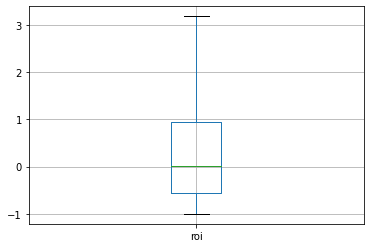

In [11]:
# boxplot showing roi
boxplot = movies_trimmed.boxplot(column=['roi'])

c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


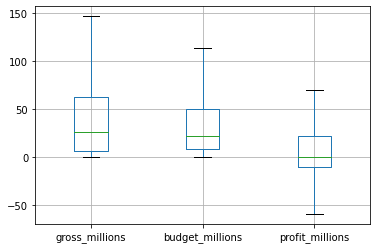

In [12]:
# boxplots showing gross, budget, profit variables
boxplot = movies_trimmed.boxplot(column=['gross_millions','budget_millions','profit_millions'])

### Explore Relationships between numeric variables

Variables moderately correlated (correlation > 0.4) with gross revenue:
* <code>num_critic_reviews</code>
* <code>num_users_voted</code>
* <code>num_user_reviews</code>
* <code>budget</code>
* <code>profit_millions</code>
* <code>roi</code>
* <code>profit_margin</code> 
<br><br>

Variables moderately correlated (correlation > 0.4) with profit:
* <code>gross_millions</code>
* <code>num_users_voted</code>
* <code>roi</code>
* <code>profit_margin</code>
<br><br>

Variables that are moderately correlated (correlation > 0.4) with profit margin:
* <code>gross_millions</code>
* <code>roi</code>
* <code>profit_margin</code>
<br><br>

Variables that are moderately correlated (correlation > 0.4) with ROI:
* <code>gross_millions</code>
* <code>profit_millions</code>
* <code>profit_margin</code>

Text(0.5, 1.0, 'Correlation Heatmap')

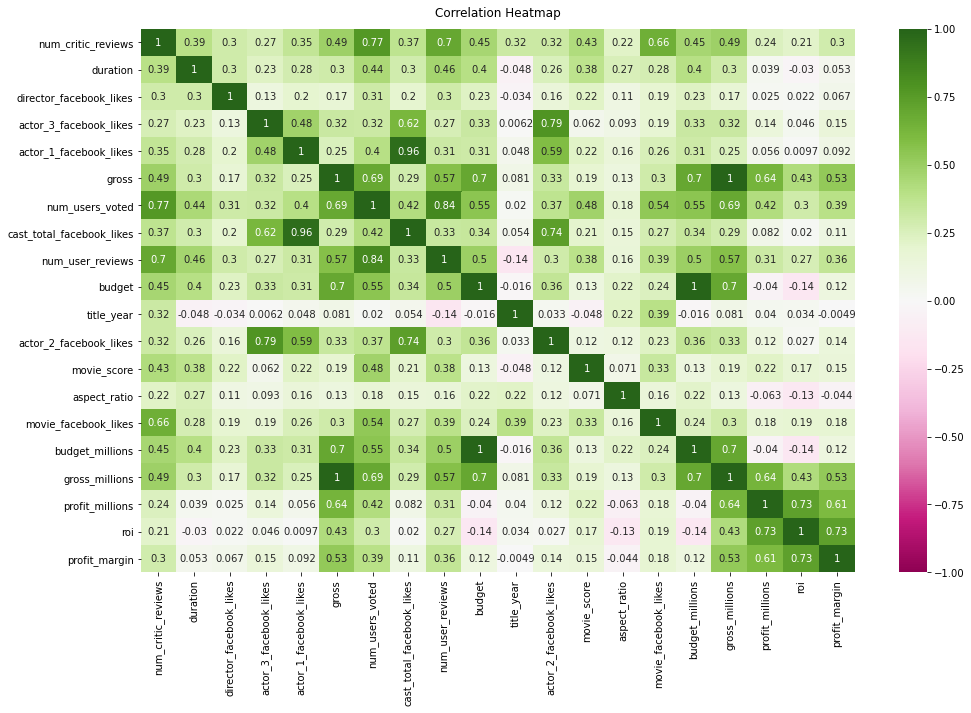

In [13]:
# define correlation matrix using movies_trimmed
corr_matrix_trimmed = movies_trimmed.corr()

# create heatmap using correlation matrix
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr_matrix_trimmed, vmin=-1, vmax=1,cmap="PiYG", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# save correlation matrix to csv
#corr_matrix_trimmed.to_csv('corr_matrix_trimmed.csv')

### Explore Categorical Variables

In [14]:
movies['director_name'].value_counts().head()

Steven Spielberg     15
Woody Allen          15
Clint Eastwood       14
Steven Soderbergh    13
Ridley Scott         12
Name: director_name, dtype: int64

In [15]:
movies['actor_1_name'].value_counts().head()

Robert De Niro    33
Matt Damon        28
Nicolas Cage      27
J.K. Simmons      27
Johnny Depp       25
Name: actor_1_name, dtype: int64

In [16]:
movies['actor_2_name'].value_counts().head()

Charlize Theron    13
Morgan Freeman     13
Brad Pitt          10
Adam Sandler       10
James Franco        9
Name: actor_2_name, dtype: int64

In [17]:
movies['actor_3_name'].value_counts().head()

Steve Coogan     8
Stephen Root     7
Kevin Dunn       6
Thomas Lennon    6
Sam Shepard      6
Name: actor_3_name, dtype: int64

In [18]:
movies['genres'].value_counts().head()

# genres will be more effectively analyzed by separating the genres

Comedy                  169
Drama                   164
Comedy|Drama            154
Comedy|Drama|Romance    148
Comedy|Romance          139
Name: genres, dtype: int64

In [19]:
movies['plot_keywords'].value_counts().head()

# plot keywords will be more effectively analyzed by separating the keywords

based on novel                                      3
one word title                                      3
two word title                                      2
after dark horrorfest                               2
dating|protective father|school|shrew|teen movie    1
Name: plot_keywords, dtype: int64

In [20]:
movies['country'].value_counts().head()

USA        2907
UK          317
Canada       99
France       78
Germany      75
Name: country, dtype: int64

In [21]:
movies['content_rating'].value_counts().head()

R            1598
PG-13        1223
PG            467
G              74
Not Rated      64
Name: content_rating, dtype: int64

# Analysis

After exploring the data through EDA, I decided to focus on 4 inputs, and two determinants of success: 
- Inputs (factors the studio can control)
  - actors (<code>actor_1_name</code>, <code>actor_2_name</code>, <code>actor_3_name</code>)
  - directors (<code>director_name</code>)
  - genres (<code>genres</code>)
  - plot keywords (<code>plot_keywords</code>)
- Determinants of success
  - profit (<code>profit_millions</code>)
  - roi (<code>roi</code>)

I also used normalized profit (<code>profit_millions_norm</code>). Profit is normalized by dividing each individual value by the average profit for all movies in our dataset. These normalized values allow me to analyze a variable's percent distance from the mean (i.e. a normalized value is 1.07 means that the variable is 7% above the mean).

I chose to ignore the non-monetary metrics that represent the popularity of a movie's actors and director (the Facebook likes the actors and director) because they have weak or non-existent correlations with the monetary metrics of a movie’s success. Moreover, Facebook didn’t exist for the entire period of time we are analyzing, and the populations that use Facebook and its various features has changed dramatically over the past 15 years.  
<br>
I assume that the financial metrics of a movie’s success are most relevant to the movie studio’s decision-making processes, and therefore will not consider the non-monetary metrics of a movie’s success in the analysis.
<br> <br>
I chose not to include profit margin(<code>profit_margin</code>) because this analysis aims to identify which elements lead to successful movies - not cost-cutting or pricing strategies which might be better captured by profit margin. Moreover, profit margin is highly correlated with ROI, so movies with strong profit margins will likely be captured in ROI analysis.

In [22]:
# define noramlized profit metric
movies['profit_millions_norm'] = movies['profit_millions'] /movies['profit_millions'].mean()

## Actor Analysis
<br>
Do certain actors tend to make more financially successful movies?
<br><br>
This analysis focuses on experienced actors - those who have been a lead actor in at least 4 movies, or a supporting actor in at least 4 movies.
<br><br>
I analyze the outcomes for the lead actor in a movie (<code>actor_1_name</code>) separately from the outcomes for the supporting actors (<code>actor_2_name</code>, <code>actor_3_name</code>), because lead actors likely influence audience decisions to see movies in a different way than supporting actors. This method is imperfect, because some movies have more than one headliner, and some have ensemble casts - these realities are not reflected in the data we have available. Therefore, the resulting lists of lead actors with strong financial outcomes may leave out some actors who were not coded as <code>actor_1_name</code> in the movies they starred in. However, this analysis will provide a strong starting point for identifying which actors appear in movies with the strongest financial outcomes.

### 1. Profit per actor (normalized)
Calculating profit per actor, as a percentage of average profit, normalizes the profit metric and allows for analysis of how each actor's average profit compares to the overall average. A number greater than 1 is above average; a number less than 1 is below average.

### 1.1 Lead actor
**Method**<br>
(1) filter <code>movies</code> to show only actors who have appeared as the lead actor (<code>actor_1_name</code>) in at least 4 movies; <br>
(2) calculate average profit per actor; <br>
(3) divide average profit per actor by overall average profit for all movies to arrive at normalized profit.
(4) create list of all actors with an average normalized profit greater than <code>profit_baseline</code>.
<br><br>
Profit baseline is set at the 75th percentile, which is equal to 2.09; a normalized profit of 2 indicates that the average profit per actor is equal to twice the overall average profit (a value of 1 is an average value).
<br>
<br>
**Result**<br>
There are 47 lead actors (<code>actor_1_name</code>) with a normalized profit value greater than the profit baseline (2.09) - indicating that the movies in which these actors are the headliner (<code>actor_1_name</code>) have an average profit that is at least twice the overall average.
<br><br>
**Recommendations**<br>
The lead actors with an average normalized profit greater than the profit baseline have a track record of appearing in movies with strong financial results, and should be hired on future movies.

In [23]:
# define values to be used to as filters
num_movies_acted = 4
profit_baseline = movies['profit_millions_norm'].quantile(0.75)
roi_baseline = movies['roi'].quantile(0.75)

In [24]:
# actor1 (lead actors)
# calculate number of movies per actor
actor1_counts = movies['actor_1_name'].value_counts()

# create a list that contains all experienced lead actors
actor1_list = actor1_counts[actor1_counts >= num_movies_acted].index.tolist()

# filter movies df to show only experienced lead actors
actor1_exp = movies[movies['actor_1_name'].isin(actor1_list)]

# groupby actor; calculate average profit per actor
actor1_profit = actor1_exp.groupby(['actor_1_name'], as_index=False)['profit_millions'].mean().sort_values(by='profit_millions', ascending=False)

# calculate difference from mean
actor1_profit['profit_pct_mean'] = (actor1_profit['profit_millions']/ movies['profit_millions'].mean())

# filter df to show only actors with a profit_pct_mean greater than profit_baseline
actor1_profit_pct_mean = actor1_profit[actor1_profit['profit_pct_mean'] > profit_baseline]

In [25]:
actor1_profit_pct_mean.count()

actor_1_name       47
profit_millions    47
profit_pct_mean    47
dtype: int64

In [26]:
actor1_profit_pct_mean.sort_values(by='profit_pct_mean', ascending=False).head(5)

actor_1_name  profit_millions  profit_pct_mean
174     Robert Pattinson       130.816533        12.817830
35   Bryce Dallas Howard       128.629950        12.603581
191         Steve Carell        97.381978         9.541803
99     Jennifer Lawrence        84.693300         8.298525
31        Bradley Cooper        80.655031         7.902842

### 1.2 Supporting actors
**Method**<br>
(1) filter <code>movies</code> to show only actors who have appeared as a supporting actors (<code>actor_2_name</code>, <code>actor_3_name</code>) in at least 4 movies; <br>
(2) calculate average profit per actor; <br>
(3) divide average profit per actor by overall average profit for all movies to arrive at normalized profit.
<br><br>
Profit baseline is set at the 75th percentile, which is equal to 2.09; a normalized profit of 2 indicates that the average profit per actor is equal to twice the overall average profit (a value of 1 is an average value).
<br>
<br>
**Result**<br>
There are 128 supporting actors (<code>actor_2_name</code>, <code>actor_3_name</code>) with an average profit, as a percent of overall average profit greater than the profit_baseline - indicating that the movies in which these actors play a supporting role have an average profit that is at least twice the overall average. 
<br>
<br>
**Recommendations**
The supporting actors with an average normalized profit greater than the profit baseline have a track record of appearing in movies with strong financial results, and should be hired on future movies.

In [27]:
# concatenate actor2 and actor3 columns to create df with all supporting actors
# create df of actor2_names
actor2_names = movies[['actor_2_name', 'profit_millions','roi']]
actor2_names = actor2_names.rename(columns={"actor_2_name": "names"})

# create df of actor3_names
actor3_names = movies[['actor_3_name','profit_millions','roi']]
actor3_names = actor3_names.rename(columns={"actor_3_name": "names"})

# concatenate actor2, and actor3 columns to create df with all supporting actors
actor_supporting = pd.concat([actor2_names, actor3_names])

# calculate number of supporting role movies per actor
actor_supporting_counts = actor_supporting['names'].value_counts()

# create a list that contains all actors who have appeared in a supporting role in a number of movies 
# that is greater than or equal to num_movies_acted
actor_supporting_lst = actor_supporting_counts[actor_supporting_counts >= num_movies_acted].index.tolist()

# filter movies df to show only experienced actors who have appeared as a supporting actor (either actor2 or actor3) 
# in a number of movies that is greater than or equal to num_movies_acted
actor_supporting_exp = actor_supporting[actor_supporting['names'].isin(actor_supporting_lst)]

In [28]:
# groupby actor; calculate average profit per actor
actor_supporting_exp_profit = actor_supporting_exp.groupby(['names'], as_index=False)['profit_millions'].mean()

# calculate difference from mean
actor_supporting_exp_profit['profit_pct_mean'] = actor_supporting_exp_profit['profit_millions'] / movies['profit_millions'].mean()

# filter df to show only actors with a profit_pct_mean greater than profit_baseline
actor_supporting_exp_profit_pct_mean = actor_supporting_exp_profit[actor_supporting_exp_profit['profit_pct_mean'] > profit_baseline]

In [29]:
actor_supporting_exp_profit_pct_mean.sort_values(by='profit_millions', ascending=False).head(5)

names  profit_millions  profit_pct_mean
41          Billy Boyd       188.838000        18.502962
229    Josh Hutcherson       184.292080        18.057538
216   Joel David Moore       176.159700        17.260701
363       Rupert Grint       118.320175        11.593396
221  John Ratzenberger       116.204283        11.386074

In [30]:
actor_supporting_exp_profit_pct_mean.count()

names              128
profit_millions    128
profit_pct_mean    128
dtype: int64

### 2. ROI per actor

### 2.1 Lead Actor
**Method**<br>
(1) filter <code>movies</code> to show only actors who have appeared as the lead actor (<code>actor_1_name</code>) in at least 4 movies; <br>
(2) calculate average ROI per actor.
<br>
<br>
ROI baseline is set at the 75th percentile, which is equal to 94%.
<br>
<br>
**Result**<br>
There are 54 lead actors (<code>actor_1_name</code>) with an average ROI greater than the ROI baseline - indicating that the movies in which these actors play the lead role have an ROI of at least 94%, on average.
<br>
<br>
**Recommendations**<br>
The lead actors with an average ROI greater than 94% have a track record of appearing in movies with strong financial results, and should be hired on future movies.

In [31]:
# actor1
# groupby actor; calculate average roi per actor
actor1_roi = actors1.groupby(['actor_1_name'], as_index=False)['roi'].mean()

# filter df to show only actors with a roi greater than roi_baseline
actor1_roi = actor1_roi[actor1_roi['roi'] >= roi_baseline]

actor1_roi_count = actor1_roi.count()

NameError: name 'actors1' is not defined

In [32]:
actor1_roi_count

NameError: name 'actor1_roi_count' is not defined

In [33]:
actor1_roi.sort_values(by='roi', ascending=False).head(5)

NameError: name 'actor1_roi' is not defined

### 2.2 Supporting Actors
**Method**<br>
(1) filter <code>movies</code> to show only actors who have appeared as a supporting actor (<code>actor_2_name</code>, <code>actor_3_name</code>) in at least 4 movies; <br>
(2) calculate average ROI per actor; <br>
(3) divide average ROI per actor by overall average ROI for all actors.
<br>
<br>
ROI baseline is set at the 75th percentile, which is equal to 94%.
<br>
<br>
**Result**<br>
There are 113 supporting actors (<code>actor_2_name</code>, <code>actor_3_name</code>) with an average ROI greater than the ROI baseline - indicating that the movies in which these actors play the lead role have an ROI of at least 94%, on average.
<br>
<br>
**Recommendations** <br>
The supporting actors with an average ROI greater than the ROI baseline have a track record of appearing in movies with strong financial results, and should be hired on future movies.

In [34]:
# groupby actor; calculate average ROI per actor
actor_supporting_exp_roi = actor_supporting_exp.groupby(['names'], as_index=False)['roi'].mean()

# filter df to show only actors with a ROI greater than roi_baseline
actor_supporting_exp_roi = actor_supporting_exp_roi[actor_supporting_exp_roi['roi'] > roi_baseline]

In [35]:
actor_supporting_exp_roi.count()

names    113
roi      113
dtype: int64

In [36]:
actor_supporting_exp_roi.sort_values(by='roi', ascending=False).head(5)

names       roi
223        Jon Gries  27.98255
31   Barbara Hershey  25.35455
124   Diedrich Bader  18.31340
384    Shawnee Smith  15.91498
146     Ethan Suplee  12.61530

### 3. Summary outcomes by actor

**Method**<br>
Analyze summary outcomes by lead actor (<code>actor_1_name</code>).
<br>
<br>
**Result**<br>
The top actors by profit and ROI have only appeared as lead actor in one or two movies and therefore will not be included in the profit per actor or ROI per actor analysis above.
<br>
<br>
**Recommendation**<br>
While the studio should aim to work with the actors identified in the previous analysis in order to seek out consistent profit, up-and-coming actor can produce successful movies, and should not be ignored. The studio should consider gathering additional data on actors who have appeared in fewer than 4 movies in order to see if any trends can be identified. The studio may also consider developing programs to identify promising young actors, such as relationships with theatre programs at universities.
<br>
<br>
Further analysis is needed to identify determinants of success for up-and-coming actors.

In [37]:
# create df with only key financial variables
actor1_mean = movies[['actor_1_name',
                      'gross_millions',
                      'profit_millions',
                      'budget_millions',
                      'roi']].groupby(['actor_1_name']).mean()

In [38]:
# group by actor; count number of movies by counting 'color' column
actor1_count = movies[['actor_1_name',
                       'color']].groupby(['actor_1_name']).count().sort_values(by='color',ascending = False)

# renname 'color' column as 'num_movies'
actor1_count = actor1_count.rename(columns = {'color': 'num_movies'})

In [39]:
# merge actor data (actor1_mean and actor1_count) into one df

# define list of dfs to be merged
actor1_df_lst = [actor1_mean, actor1_count]

# merge dfs in actor1_df_lst
actor1_df = reduce(lambda left,right: pd.merge(left,right,on='actor_1_name'), actor1_df_lst)

# rename columns
actor1_df = actor1_df.rename(columns = {'gross_millions': 'avg_gross_millions',
                                        'budget_millions': 'avg_budget_million',
                                        'profit_millions':'avg_profit_millions',
                                        'roi':'avg_roi'})

In [40]:
# actors who are lead actor in the most movies
actor1_df.sort_values(by = 'num_movies', ascending = False).head(5)

avg_gross_millions  avg_profit_millions  avg_budget_million  \
actor_1_name                                                                  
Robert De Niro           55.952390            14.920132           39.575758   
Matt Damon               62.769579             9.306904           55.627778   
Nicolas Cage             53.619232            -7.340768           57.637778   
J.K. Simmons             70.235585            19.261511           50.974074   
Johnny Depp             104.667254             8.725417           96.312500   

                 avg_roi  num_movies  
actor_1_name                          
Robert De Niro  0.504245          33  
Matt Damon      1.924622          28  
Nicolas Cage   -0.197072          27  
J.K. Simmons    0.550715          27  
Johnny Depp     0.140478          25

In [41]:
# actors with top average profit
actor1_df.sort_values(by = 'avg_profit_millions', ascending = False).head(5)

avg_gross_millions  avg_profit_millions  avg_budget_million  \
actor_1_name                                                                    
Rupert Everett             436.47100            286.47100               150.0   
CCH Pounder                413.68395            253.68395               160.0   
Catherine Dyer             255.95040            226.95040                29.0   
Kathleen Freeman           267.65200            207.65200                60.0   
Phaldut Sharma             274.08500            174.08500               100.0   

                  avg_roi  num_movies  
actor_1_name                           
Rupert Everett    1.90980           1  
CCH Pounder       1.00725           2  
Catherine Dyer    7.82590           1  
Kathleen Freeman  3.46090           1  
Phaldut Sharma    1.74080           1

In [42]:
# calculate percent of the 100 actors with the highest average profit who have been lead actor in fewer than 4 movies
actor1_df_top_profit = actor1_df.sort_values(by = 'avg_profit_millions', ascending = False).head(100)
actor1_df_top_profit = actor1_df_top_profit[actor1_df_top_profit['num_movies'] < 4]
len(actor1_df_top_profit) / 100

0.86

In [43]:
# actors with top average roi
actor1_df.sort_values(by = 'avg_roi', ascending = False).head(5)

avg_gross_millions  avg_profit_millions  avg_budget_million  \
actor_1_name                                                                   
Micah Sloat                107.9173             107.9023              0.0150   
Greg Ayres                   0.5920               0.5918              0.0002   
Heather Donahue            140.5301             140.4701              0.0600   
Pfeifer Brown               22.7578              22.6578              0.1000   
Chemeeka Walker             11.5294              11.4644              0.0650   

                   avg_roi  num_movies  
actor_1_name                            
Micah Sloat      7193.4867           1  
Greg Ayres       2959.0000           1  
Heather Donahue  2341.1683           1  
Pfeifer Brown     226.5780           1  
Chemeeka Walker   176.3754           1

In [44]:
# calculate percent of the 100 actors with the highest average roi who have been lead actor in fewer than 4 movies
actor1_df_top_roi = actor1_df.sort_values(by = 'avg_roi', ascending = False).head(100)
actor1_df_top_roi = actor1_df_top_roi[actor1_df_top_roi['num_movies'] < 4]
len(actor1_df_top_roi) / 100

0.95

## Analyze director success

Do certain directors tend to direct more financially successful movies?

### 1. Profit per director (normalized)
Calculating profit per director, as a percentage of average profit normalizes the profit metric and allows for analysis of how each director's average profit compares to the overall average. A number greater than 1 is above average; a number less than 1 is below average.
<br><br>
**Method**<br>
(1) filter <code>movies</code> to show only directors (<code>director_name</code>) who have directed at least 4 movies; <br>
(2) calculate average profit per director; 
<br>
(3) divide average profit per actor by overall average profit for all directors.
<br><br>
Profit baseline is set at the 75th percentile, which is equal to 2.09; a normalized profit of 2 indicates that the average profit per actor is equal to twice the overall average profit (a value of 1 is an average value).
<br><br>
**Result**<br>
There are 74 directors actors with a normalized profit value greater than the profit baseline (2.09) - indicating that the movies in which these directors direct have an average profit that is at least twice the overall average.
<br><br>
**Recommendations**<br>
The lead actors with an average normalized profit greater than the profit baseline have a track record of appearing in movies with strong financial results, and should be hired on future movies.

In [45]:
# define values to be used to as filters
num_movies_directed = 4
profit_baseline = movies['profit_millions_norm'].quantile(0.75)
roi_baseline = movies['roi'].quantile(0.75)

In [46]:
# calculate number of movies per director
director_counts = movies['director_name'].value_counts()

# create a list that contains all experienced directors
director_list = director_counts[director_counts >= num_movies_directed].index.tolist()

# filter movies df to show only experienced directors
director = movies[movies['director_name'].isin(director_list)]

# groupby director, calculate average profit per director
director_profit = director.groupby(['director_name'], as_index=False)['profit_millions'].mean().sort_values (by='profit_millions', ascending=False)

# calculate percent difference from mean
director_profit['profit_pct_mean'] = (director_profit['profit_millions']/ movies['profit_millions'].mean())
director_profit_pct_mean = director_profit[director_profit['profit_pct_mean'] > profit_baseline] 

In [47]:
director_profit_pct_mean.count()

director_name      74
profit_millions    74
profit_pct_mean    74
dtype: int64

In [48]:
director_profit_pct_mean.head(5)

director_name  profit_millions  profit_pct_mean
175      Peter Jackson        151.96680        14.890202
68    Francis Lawrence        151.10040        14.805309
6       Andrew Adamson        130.61170        12.797759
178          Phil Lord        115.17260        11.284986
38   Christopher Nolan        101.02845         9.899096

### 2. ROI per director
**Method**<br>
(1) filter <code>movies</code> to show only directors who have directed at least 4 movies; <br>
(2) calculate average ROI per director.
<br>
<br>
ROI baseline is set at the 75th percentile, which is equal to 94%.
<br>
<br>
**Result**<br>
There are 77 directors with an average ROI greater than the ROI baseline - indicating that the movies in which these actors play the lead role have an ROI of at least 94%, on average.
<br>
<br>
**Recommendations**<br>
The directors with an average ROI greater than the ROI baseline have a track record of appearing in movies with strong financial results, and should be hired on future movies.

In [49]:
# calculating profit as a pct. of average profit for directors
director_counts = movies['director_name'].value_counts()

# creating a list with a condition of having appeared in at least 5 movies
director_list = director_counts[director_counts >= num_movies_directed].index.tolist()

# creating a dataframe with actors in 5 or more movies
director = movies[movies['director_name'].isin(director_list)]

# creating a dataframe with actors and the average profit
director_total = director.groupby(['director_name'], as_index=False)['roi'].mean().sort_values (by='roi', ascending=False)

director_roi = director_total[director_total['roi'] > roi_baseline] 

director_roi_count = director_roi.count()

In [50]:
director_roi_count

director_name    77
roi              77
dtype: int64

In [51]:
director_roi.sort_values(by='roi',ascending = False).head(5)

director_name        roi
3          Alex Kendrick  60.970367
89             James Wan  14.773729
44      Darren Aronofsky  10.352950
146        Michael Moore   8.294400
45   Darren Lynn Bousman   8.028700

### 3. Summary outcomes by director

**Method**<br>
Analyze summary outcomes by director.
<br><br>
**Result**<br>
Several of the top directors by profit and ROI have only directed one or two movies and therefore will not be included in the profit per director analysis.<br> 

**Recommendation**<br>
While the studio should aim to work with directors with a track record of financial success in order to seek out consistent profit, the most profitable directors, and those whose movies have the highest ROIs, are can often be up-and-coming directors. Therefore, the studio should not ignore new talent and should look for opportunities to engage with aspiring directors.
<br>
<br>
Further analysis is needed to determine determinants of success for up-and-coming directors.

In [52]:
# group by director; calculate average of key financial variables
directors_mean = movies[['director_name','gross_millions','profit_millions','budget_millions','roi']].groupby(['director_name']).mean()

In [53]:
# group by director; count number of movies by counting 'color' column
directors_count = movies[['director_name','color']].groupby(['director_name']).count().sort_values(by='color',ascending = False)

# renname 'color' column as 'count'
directors_count = directors_count.rename(columns = {'color': 'num_movies'})

In [54]:
# merge director data (directors_mean, directors_count) into one df

# define list of dfs to be merged
directors_df_lst = [directors_mean, directors_count]

# merge dfs in directors_df_lst
directors_df = reduce(lambda left,right: pd.merge(left,right,on='director_name'), directors_df_lst)

# rename columns
directors_df = directors_df.rename(columns = {'gross_millions': 'avg_gross_millions',
                                             'budget_millions': 'avg_budget_million',
                                              'profit_millions':'avg_profit_millions',
                                              'roi':'avg_roi'})

#directors_df.to_csv('directors_df.csv')

In [55]:
# directors who directed the largest number of movies
directors_df.sort_values(by = 'num_movies', ascending = False).head()

avg_gross_millions  avg_profit_millions  \
director_name                                                
Woody Allen                 15.347033            -1.552967   
Steven Spielberg           133.659013            45.259013   
Clint Eastwood              78.882093            30.896379   
Steven Soderbergh           73.975315            29.206085   
Ridley Scott                88.017692            -2.065642   

                   avg_budget_million   avg_roi  num_movies  
director_name                                                
Woody Allen                 16.900000  0.033160          15  
Steven Spielberg            88.400000  0.661140          15  
Clint Eastwood              47.985714  0.834993          14  
Steven Soderbergh           44.769231  1.462954          13  
Ridley Scott                90.083333 -0.085708          12

In [56]:
# directors with top average profit
directors_df.sort_values(by = 'avg_profit_millions', ascending = False).head()

avg_gross_millions  avg_profit_millions  avg_budget_million  \
director_name                                                                  
James Cameron             709.58905           491.089050          218.500000   
Tim Miller                363.02430           305.024300           58.000000   
George Lucas              388.49430           274.160967          114.333333   
Kyle Balda                336.02960           262.029600           74.000000   
Colin Trevorrow           328.09255           252.717550           75.375000   

                  avg_roi  num_movies  
director_name                          
James Cameron    2.251150           2  
Tim Miller       5.259000           1  
George Lucas     2.397733           3  
Kyle Balda       3.540900           1  
Colin Trevorrow  3.845750           2

In [57]:
# calculate percent of the 100 directors with the highest average profit who directed fewer than 4 movies
directors_df_top_profit = directors_df.sort_values(by = 'avg_profit_millions', ascending = False).head(100)
directors_df_top_profit = directors_df_top_profit[directors_df_top_profit['num_movies'] < 4]
len(directors_df_top_profit) / 100

0.75

In [58]:
# directors with top average roi
directors_df.sort_values(by = 'avg_roi', ascending = False).head()

avg_gross_millions  avg_profit_millions  \
director_name                                                
Oren Peli                  107.917300             107.9023   
Jonathan Caouette            0.592000               0.5918   
Daniel Myrick              140.530100             140.4701   
Travis Cluff                22.757800              22.6578   
Alex Kendrick               26.049467              25.1828   

                   avg_budget_million      avg_roi  num_movies  
director_name                                                   
Oren Peli                      2.5075  7193.486700           2  
Jonathan Caouette              0.0002  2959.000000           1  
Daniel Myrick                  0.0600  2341.168300           1  
Travis Cluff                   0.1000   226.578000           1  
Alex Kendrick                  0.6550    60.970367           4

In [59]:
# calculate percent of the 100 directors with the highest average profit who directed fewer than 4 movies
directors_df_top_roi = directors_df.sort_values(by = 'avg_roi', ascending = False).head(100)
directors_df_top_roi = directors_df_top_roi[directors_df_top_roi['avg_roi'] < 4]
len(directors_df_top_roi) / 100

0.21

## Analzye Genre Success
Which movie genres are the most financially successful?

Movies can be classified under more than one genre. Any movie that is classified under a genre is included in that genre's analysis. For example - a movie whose genres are "romance" and "comedy" is included in the analyses for both genres.

**Method** <br>
Analyze outcomes by genre.

**Results** 
- Gross
  - Adventure, Animation, Family, Fantasy and Sci-fi movies are the highest grossing, on average.
    - Despite high average gross, Animation had low total gross due to the fact that only 2% of movies are Animations.
    - The Adventure, Family, Fantasy, and Sci-fi genres each represent 4.3% - 6.3% of all movies.
- Profit
  - Animation and Family have the highest average profits.
  - Action, Crime, Drama, and Thriller tend have below-average profits. Action, thriller, and crime movies are relatively common - representing 8.1% 10.7%, and 6.5% of all movies, respectively. Drama is the most common genre; 18.6% of all movies are Dramas.
  - Comedies have the highest total profit; comedies are common (15% of all movies) and have above-average profitability.
  
**Recommendations** <br>
Focus on growth in two categories:
- Blockbusters (high margin, low volume)
  - Genres: Adventure, Sci-fi, and Fantasy movies
  - Budget: High-budget
  - Frequency: low frequency
- Crowd-pleasers (low margin, high volume)
  - Genres: Romance, Comedy, Animation, Family
  - Budget: low-budget
  - Frequency: high frequency
  
De-emphasize less profitable genres - including Action, Crime, Thiller, and Drama.

In [60]:
# add binary genre variable to movies df

# create list of genres
genre_lst = ['Action',
             'Adventure',
             'Animation',
             'Comedy',
             'Crime',
             'Documentary',
             'Drama',
             'Family',
             'Fantasy',
             'Music',
             'Mystery',
             'Thriller',
             'Horror',
             'Romance',
             'Sci-Fi']

# create column for each genre in genre_lst
for x in genre_lst:
    movies['genre_' + x.lower()] = ""

# populate columns with binary field
for x in range(len(movies['genres'])):
    for y in genre_lst:
        if y in movies['genres'][x]:
            movies['genre_' + y.lower()][x] = y.lower()
        else:
            movies['genre_' + y.lower()][x] = 'not ' + y.lower()

c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
# create df to analyze count by genre
genre_count = pd.DataFrame()
for x in genre_lst:
    x = movies.groupby(['genre_' + x.lower()]).count()
    x = x.rename_axis('genre', axis= 0)
    genre_count = genre_count.append(x)

genre_count = genre_count[genre_count.index.str.contains("not")==False]

genre_count['pct_total']= genre_count['color'] / genre_count['color'].sum()

genre_count = genre_count[['color','pct_total']].copy()
genre_count = genre_count.rename(columns={"color": "count"})

### Average outcome by genre

In [62]:
# create df to analyze average outcome by genre
genre_avg = pd.DataFrame()
for x in genre_lst:
    x = movies.groupby(['genre_' + x.lower()]).mean()
    x = x.rename_axis('genre', axis= 0)
    genre_avg = genre_avg.append(x)

genre_avg = genre_avg[genre_avg.index.str.contains("not")==False]

genre_avg = genre_avg[['budget_millions','gross_millions','profit_millions','roi']]

In [63]:
# merge genre count and genre average outcome data into one df
genre_df_lst = [genre_avg, genre_count]
genre_avg_df = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True), genre_df_lst)

# rename columns
genre_avg_df = genre_avg_df.rename(columns = {'gross_millions': 'avg_gross_millions',
                                              'budget_millions': 'avg_budget_million',
                                              'profit_millions':'avg_profit_millions',
                                              'roi':'avg_roi',
                                              'color':'total_num'})

# shorten 'documentary' index to create more aesthetically pleasing visualizations
genre_avg_df = genre_avg_df.rename(index={'documentary':'doc.'})

In [64]:
#genre_df.to_csv('genre_df.csv')

In [65]:
genre_avg_df.sort_values(by = 'avg_roi', ascending = False)

avg_budget_million  avg_gross_millions  avg_profit_millions  \
genre                                                                    
doc.                 4.894068           12.128262             6.630271   
horror              19.474574           34.660050            11.470893   
mystery             35.860326           47.086040             9.389785   
comedy              33.623446           47.929497            14.500878   
drama               27.970061           33.243072             5.343215   
romance             30.233450           40.095752            10.279925   
thriller            39.119974           47.526337             4.954355   
music               28.392785           38.740977            12.027151   
family              65.333377           87.231641            20.085309   
sci-fi              67.267909           84.312389            13.753866   
fantasy             70.834450           88.529675            16.207542   
animation           81.286702          109.828187            25.892274   
adventure           84.330275          102.900651            16.790618   
crime               31.818620           37.491894             4.837784   
action              67.647873           80.109331             7.406759   

             avg_roi  count  pct_total  
genre                                   
doc.       56.924669    103   0.010600  
horror     37.122135    397   0.040856  
mystery     1.206741    376   0.038695  
comedy      1.111212   1460   0.150252  
drama       1.063906   1813   0.186580  
romance     1.026118    799   0.082227  
thriller    0.924541   1037   0.106720  
music       0.845425    230   0.023670  
family      0.599959    419   0.043120  
sci-fi      0.502094    425   0.043738  
fantasy     0.469444    418   0.043017  
animation   0.444599    194   0.019965  
adventure   0.382039    615   0.063291  
crime       0.251857    640   0.065864  
action      0.142374    791   0.081404

#### barplot - average gross by genre

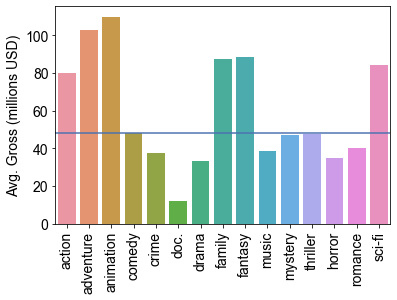

In [66]:
plt.clf()

genre_avg_gross = sns.barplot(x= genre_avg_df.index, y="avg_gross_millions", data=genre_avg_df)
genre_avg_gross.set_xticklabels(genre_avg_gross.get_xticklabels(),rotation=90, fontsize = 14)
genre_avg_gross.set_yticklabels([0,20,40,60,80,100], fontsize = 14)
genre_avg_gross.set_ylabel("Avg. Gross (millions USD)", fontsize = 14)
genre_avg_gross.set_xlabel('', fontsize = 14)
genre_avg_gross.axhline(movies['gross_millions'].mean())
sns.set(rc={'figure.figsize':(10,5)})

plt.savefig('barplot_avg_gross_genre.png', dpi = 100, bbox_inches = 'tight')

#### barplot - average profit by genre

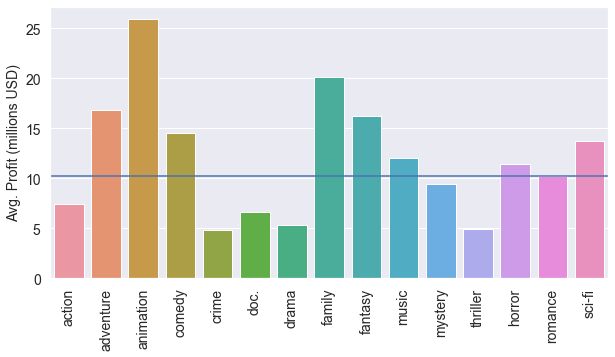

In [67]:
plt.clf()

genre_avg_profit = sns.barplot(x= genre_avg_df.index, y="avg_profit_millions", data=genre_avg_df)
genre_avg_profit.set_xticklabels(genre_avg_profit.get_xticklabels(),rotation=90,fontsize = 14)
genre_avg_profit.set_yticklabels([0,5,10,15,20,25], fontsize = 14)
genre_avg_profit.set_ylabel("Avg. Profit (millions USD)", fontsize = 14)
genre_avg_profit.set_xlabel('', fontsize = 18)
genre_avg_profit.axhline(movies['profit_millions'].mean())

sns.set(rc={'figure.figsize':(10,5)})

plt.savefig('barplot_avg_profit_genre.png', dpi = 100, bbox_inches = 'tight')

### Total outcome (sum) by genre

In [68]:
genre_sum = pd.DataFrame()
for x in genre_lst:
    x = movies.groupby(['genre_' + x.lower()]).sum()
    x = x.rename_axis('genre', axis= 0)
    genre_sum = genre_sum.append(x)

genre_sum = genre_sum[genre_sum.index.str.contains("not")==False]
genre_sum = genre_sum[['budget_millions','gross_millions','profit_millions']]

In [69]:
# merge genre count and genre average outcome data into one df
genre_df_lst = [genre_sum, genre_count]

#directors_df = reduce(lambda left,right: pd.merge(left,right,on='director_name'), directors_df_lst)

genre_sum_df = reduce(lambda left,right: pd.merge(left, right, left_index=True, right_index=True), genre_df_lst)
genre_sum_df = genre_sum_df.rename(columns = {'gross_millions': 'total_gross_millions',
                                             'budget_millions': 'total_budget_million',
                                              'profit_millions':'total_profit_millions',
                                     'color':'total_num'})
genre_sum_df = genre_sum_df.rename(index={'documentary':'doc.'})

genre_sum_df.sort_values(by = 'total_gross_millions', ascending = False)

#genre_df.to_csv('genre_df.csv')

total_budget_million  total_gross_millions  total_profit_millions  \
genre                                                                          
comedy               45223.5352            64321.3845             18097.0954   
adventure            50598.1650            60196.8807              9654.6053   
action               52156.5100            56957.7346              5184.7316   
drama                46010.7508            53920.2620              7945.3610   
thriller             38533.1744            42203.3871              4240.9283   
fantasy              28333.7800            34349.5139              6142.6583   
family               26198.6840            33933.1085              7531.9909   
sci-fi               27445.3070            32544.5820              5212.7152   
romance              22463.4532            29550.5692              7062.3085   
crime                19377.5398            21782.7904              2670.4566   
animation            15281.9000            19769.0736              4582.9325   
mystery              12658.6950            15585.4794              2985.9515   
horror                7147.1688            10120.7345              3211.8500   
music                 5678.5570             7980.6412              2176.9143   
doc.                   396.4195              970.2610               384.5557   

           count  pct_total  
genre                        
comedy      1460   0.150252  
adventure    615   0.063291  
action       791   0.081404  
drama       1813   0.186580  
thriller    1037   0.106720  
fantasy      418   0.043017  
family       419   0.043120  
sci-fi       425   0.043738  
romance      799   0.082227  
crime        640   0.065864  
animation    194   0.019965  
mystery      376   0.038695  
horror       397   0.040856  
music        230   0.023670  
doc.         103   0.010600

#### barplot - total gross by genre

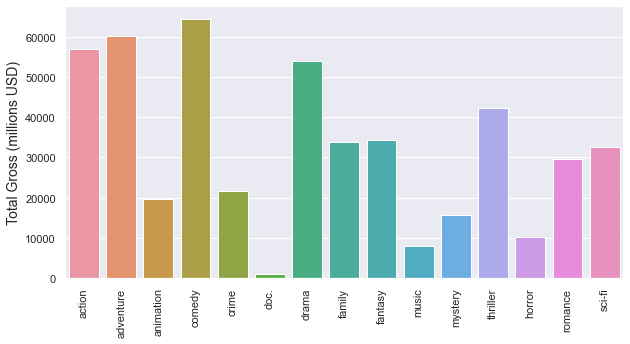

In [70]:
plt.clf()
genre_sum_gross = sns.barplot(x= genre_sum_df.index, y="total_gross_millions", data=genre_sum_df)
genre_sum_gross.set_xticklabels(genre_sum_gross.get_xticklabels(),rotation=90)
#genre_sum_gross.set_yticklabels([0,20,40,60,80,100], fontsize = 14)
genre_sum_gross.set_ylabel("Total Gross (millions USD)", fontsize = 14)
genre_sum_gross.set_xlabel('', fontsize = 14)
sns.set(rc={'figure.figsize':(10,5)})
plt.savefig('genre_sum_gross.png', dpi = 100, bbox_inches = 'tight')

#### barplot - total profit by genre

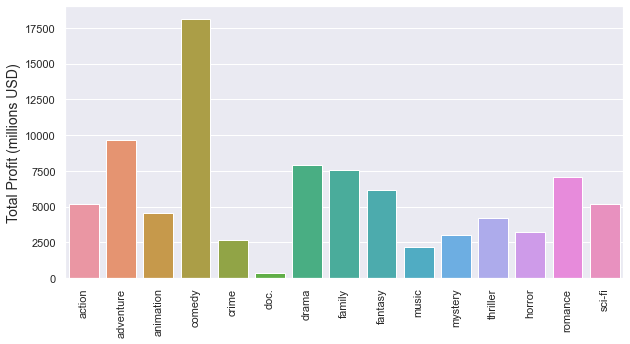

In [71]:
plt.clf()
genre_sum_profit = sns.barplot(x= genre_sum_df.index, y="total_profit_millions", data=genre_sum_df)
genre_sum_profit.set_xticklabels(genre_sum_profit.get_xticklabels(),rotation=90)
genre_sum_profit.set_ylabel("Total Profit (millions USD)", fontsize = 14)
genre_sum_profit.set_xlabel('', fontsize = 14)
sns.set(rc={'figure.figsize':(10,5)})
plt.savefig('genre_sum_profit.png', dpi = 100, bbox_inches = 'tight')

## Keyword Analysis

Which keywords are associated with the greatest financial success?
<br>
<br>
**Method**<br>
(1) filter <code>movies</code>  to show only keywords that are associated with at least 30 movies; <br>
(2) calculate average outcomes per keyword. <br>
<br>
**Result**<br>
There are only 4 keywords with average normalized profit greater than the profit baseline, and 19 with average ROI greater than the ROI baseline. This indicates that there is likely large variation in the outcomes for any given keyword. Because the normalized profit and ROI analysis did not produce many keywords of interest, we will instead look at the highest grossing and most profitable keywords.

Highest grossing and most profitable keywords:
- Movies with the plot keywords 'sequel','battle','spy', 'alien', and 'island' the highest grossing, on average. 
- Movies with the plot keywords 'wedding', 'island', 'high school', 'female nudity', and 'hospital' are the most profitable, on average. 
- Movies with the plot keywords 'small town', 'writer', 'escape', 'scientist', 'boy', 'future', and 'box office flop' are not profitable, on average.

**Result**<br>
The plot keywords with the highest average gross and profit are likely to be associated with financially succesful films. Future films should consider these plot themes.

### Separate plot keywords; create binary variables for each keyword

In [215]:
# create list of plot keywords
movies['plot_keywords'] = movies['plot_keywords'].astype(str)
lst = movies['plot_keywords'].tolist()

# define empty list
lst_keywords = []

# split keywords on |; append keywords to lst_keywords
for i in lst:
    lst_keywords.append(i.split('|'))

# define function to flatten list of lists into one list 
# (function pulled from stack overflow: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists)
def flatten(t):
    return [item for sublist in t for item in sublist]

# apply flatten() to lst_keywords to create list of all keywords
keywords = pd.DataFrame(flatten(lst_keywords),columns=['keywords'])

In [216]:
# define num_movies
num_movies = 30

#calculate value counts for each keyword
keyword_counts = keywords['keywords'].value_counts()

#create a list of keywords that are associated with at least 50 movies
keyword_lst = keyword_counts[keyword_counts >= num_movies].index.tolist()

#create a dataframe with keywords associated with 50 or more movies
keyword = movies[movies['plot_keywords'].isin(keyword_lst)]

In [217]:
# add binary keyword variable to movies df
movies_kw = movies

# create column for each genre in genre_lst
for x in keyword_lst:
    movies_kw['keyword_' + x.lower()] = ""

# populate columns with binary field
for x in range(len(movies_kw['plot_keywords'])):
    for y in keyword_lst:
        if y in movies_kw['plot_keywords'][x]:
            movies_kw['keyword_' + y.lower()][x] = y.lower()
        else:
            movies_kw['keyword_' + y.lower()][x] = 'not ' + y.lower()

c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Analyze average outcome by keyword

In [232]:
kw_avg = pd.DataFrame()
for x in keyword_lst:
    x = movies_kw.groupby(['keyword_' + x.lower()]).mean()
    x = x.rename_axis('keyword', axis= 0)
    kw_avg = kw_avg.append(x)

kw_avg = kw_avg[kw_avg.index.str.contains("not")==False]

kw_avg = kw_avg[['budget_millions','gross_millions','profit_millions','roi']]

In [229]:
kw_avg.sort_values(by = 'profit_millions', ascending = False).head()

budget_millions  gross_millions  profit_millions       roi  \
keyword                                                                     
wedding              28.698864       51.316095        24.116329  0.734705   
island               46.929762       70.969746        23.616500  0.296215   
high school          18.035000       38.581123        22.418203  6.621748   
female nudity        20.799730       40.099836        22.259837  1.104181   
hospital             27.102500       49.144468        21.050572  1.069261   

               profit_pct_mean  
keyword                         
wedding               2.362996  
island                2.314022  
high school           2.196608  
female nudity         2.181091  
hospital              2.062604

In [230]:
# calculate percent difference from mean
kw_avg['profit_pct_mean'] = (kw_avg['profit_millions']/ movies['profit_millions'].mean())
kw_profit_pct_mean = kw_avg[kw_avg['profit_pct_mean'] > profit_baseline] 

In [231]:
kw_profit_pct_mean.sort_values(by = 'roi', ascending = False).head()

budget_millions  gross_millions  profit_millions       roi  \
keyword                                                                     
high school          18.035000       38.581123        22.418203  6.621748   
female nudity        20.799730       40.099836        22.259837  1.104181   
wedding              28.698864       51.316095        24.116329  0.734705   
island               46.929762       70.969746        23.616500  0.296215   

               profit_pct_mean  
keyword                         
high school           2.196608  
female nudity         2.181091  
wedding               2.362996  
island                2.314022

In [225]:
kw_profit_pct_mean.count()

budget_millions    4
gross_millions     4
profit_millions    4
roi                4
profit_pct_mean    4
dtype: int64

In [226]:
kw_roi = kw_avg[kw_avg['roi'] > roi_baseline] 

In [227]:
kw_roi.sort_values(by = 'roi', ascending = False).head(5)

budget_millions  gross_millions  profit_millions       roi  \
keyword                                                                     
high school          18.035000       38.581123        22.418203  6.621748   
school               19.177037       37.312667        19.522719  3.935040   
secret               35.690234       49.770390        12.971335  3.528938   
serial killer        28.538485       36.545540         6.777207  2.530257   
friendship           19.484174       35.325161        19.730798  2.347536   

               profit_pct_mean  
keyword                         
high school           2.196608  
school                1.912900  
secret                1.270974  
serial killer         0.664053  
friendship            1.933288

In [228]:
kw_roi.count()

budget_millions    19
gross_millions     19
profit_millions    19
roi                19
profit_pct_mean    19
dtype: int64

# Ideas for additional analysis

- How successful are sequels and series'?
<br>
- Closer look at popular groupings of genres (i.e. romance and comedy; action and adventure).
<br>
- Closer look at popular groupings of keywords. 
- Group similar keywords together.
- Analysis of outcomes by content rating.